In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
wav = wave.open("/content/si695.wav")
print(type(wav))
sample_rate = wav.getframerate()
print(sample_rate)
frames = wav.getnframes()
print(f"frames: {frames}")
raw = wav.readframes(frames)
#TIMIT's audio files are in .wav format, with 1 channel, 16-bit samples, and a 16,000 Hz sample rate.
signal = np.frombuffer(raw, dtype=np.int16)
print(f"Signal shape is {signal.shape}")

<class 'wave.Wave_read'>
16000
frames: 45568
Signal shape is (45568,)


In [ ]:
for i in range(0, len(signal), 1000):
    print(i, signal[i])


0 -1
1000 2
2000 -2
3000 -144
4000 -110
5000 -201
6000 -212
7000 88
8000 43
9000 -351
10000 -191
11000 -246
12000 11
13000 61
14000 183
15000 97
16000 -54
17000 -34
18000 15
19000 -195
20000 330
21000 -128
22000 730
23000 110
24000 0
25000 1
26000 51
27000 -158
28000 367
29000 -85
30000 -7
31000 -14
32000 209
33000 69
34000 -24
35000 -70
36000 -100
37000 -30
38000 -107
39000 37
40000 13
41000 -49
42000 -3
43000 2
44000 1
45000 -2


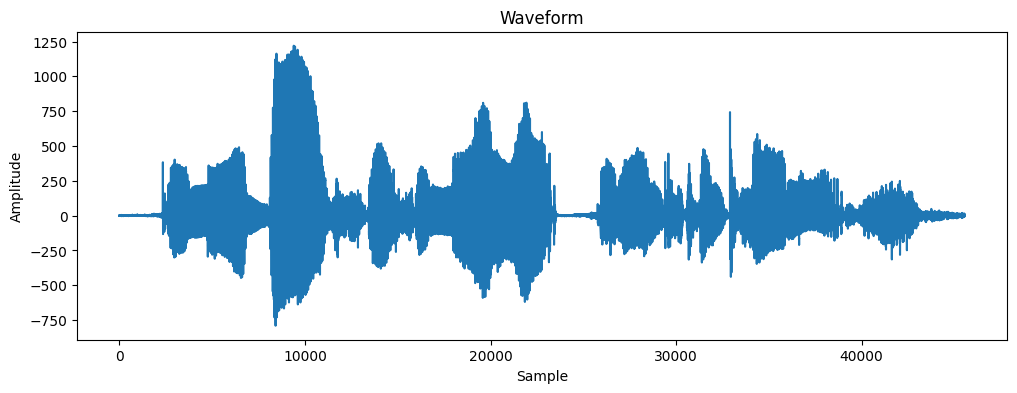

In [ ]:
plt.figure(figsize=(12,4))
#plt.plot(signal[:100])
plt.plot(signal)
plt.title("Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
window_ms = 25
hop_ms = 10

window_samples = int(sample_rate * window_ms / 1000)
hop_samples = int(sample_rate * hop_ms / 1000)

print(window_samples, hop_samples)

400 160


In [ ]:
windows = []
for start in range(0, len(signal) - window_samples, hop_samples):
    chunk = signal[start:start + window_samples]
    windows.append(chunk)



In [ ]:
fft_windows = []

for window in windows:
  fft_window = np.fft.fft(window)
  fft_windows.append(fft_window)


print(len(fft_windows))
print(fft_windows[0])
print(fft_windows[0].shape)

283
[ 2.31000000e+02+0.00000000e+00j  1.11931027e+01+5.11008792e+01j
 -2.73322104e+00+2.38625413e+00j -4.31218549e+01-4.85980335e+01j
 -6.86256011e+00+3.02931920e+01j  2.56868783e+01-6.29455073e+00j
 -3.44262661e+01+6.19262867e+01j  2.42966344e+01-2.11413958e+01j
 -4.16199970e+01+6.66626047e+00j  9.65848709e+00+1.02482664e+01j
  9.63673445e+00+2.24223297e+01j -1.97128457e+01-4.18359564e+01j
  1.52273459e+01-1.30824026e+01j  1.09634926e+01-1.63699685e+01j
  1.28374628e+01-1.50701331e+01j -9.07176309e+00-1.99952611e+00j
  1.51345066e+01+1.36914965e+01j -5.36178730e+00+5.79065561e+00j
  8.05644667e+00+2.21463322e+01j -2.99776308e+01-8.68853344e+00j
  1.38587298e+01-5.41761681e+00j  4.81478035e+01+3.91545527e+01j
  1.33497933e+01-2.10681662e+01j -4.87850137e+01+1.61152885e+01j
  1.24828950e+01+2.05212097e+00j  3.59322967e+01+2.45082062e+01j
 -2.99633371e+00+4.35602816e+00j  5.23900697e+01+2.16725756e+01j
 -3.61462213e+00-4.45289974e+00j  1.71756926e+01+1.59667452e+01j
 -6.58308951e+00-4.42

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


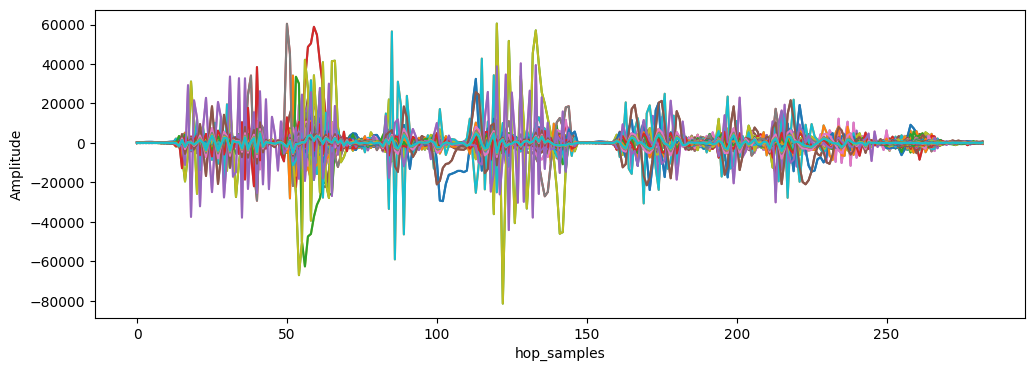

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(fft_windows)
plt.xlabel("hop_samples")
plt.ylabel("Amplitude")
plt.show()

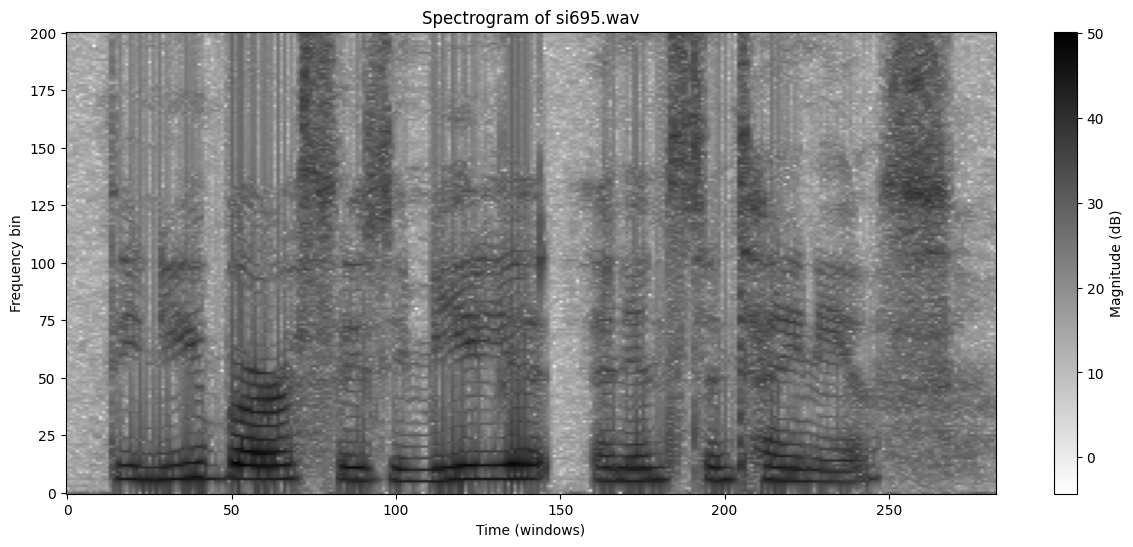

In [ ]:
fft_windows = [np.fft.rfft(w) for w in windows]

def log_mag(X):
    return 10 * np.log10(np.abs(X) + 1e-10)

log_magnitudes = [log_mag(X) for X in fft_windows]

spectrogram_matrix = np.array(log_magnitudes).T

plt.figure(figsize=(15, 6))
plt.imshow(spectrogram_matrix, cmap='gray_r', aspect='auto', origin='lower')
plt.title('Spectrogram of si695.wav')
plt.xlabel('Time (windows)')
plt.ylabel('Frequency bin')
plt.colorbar(label='Magnitude (dB)')
plt.show()
